In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import os.path
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import matplotlib.patheffects as pe
from pandas.tseries.offsets import MonthEnd
import math

In [33]:
cm = 1 / 2.54  # inches to cm
wu = 16*cm  # width unit
hu = 10*cm  # height unit

LEAST_SIZE = 7
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Aldegondabreen:

In [59]:
in_file = os.path.join(globals()['_dh'][0], "data/Alde_stakes.csv")
fig_dir = os.path.join(globals()['_dh'][0], "fig")

tmp = pd.read_csv(in_file, encoding="cp1252")
# tmp.info()

in_file = os.path.join(globals()['_dh'][0], "data/Alde_annual.csv")
stats = pd.read_csv(in_file, encoding="cp1252")
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       10 non-null     int64  
 1   SLOPE      10 non-null     float64
 2   INTERCEPT  10 non-null     float64
 3   ELA        10 non-null     int64  
 4   GRADIENT   10 non-null     float64
 5   RMSE       10 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 608.0 bytes


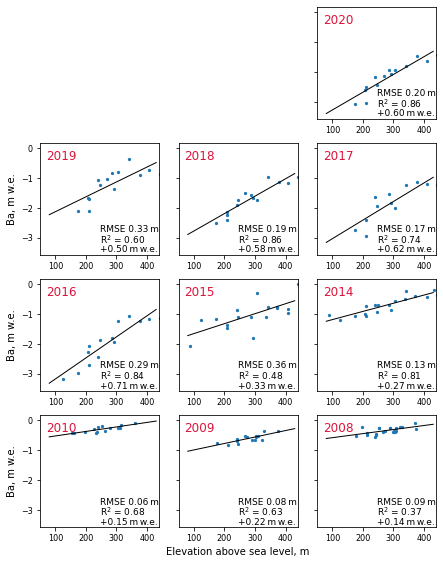

In [83]:
fig, axes = plt.subplots(4, 3, sharey=True)
fig.set_size_inches(1*wu, 2*hu)
axes = axes.flatten()


# print(len(tmp["YEAR"].unique()))
# print(tmp["ELEV"].min(), tmp["ELEV"].max())
xrange = [80, 430]

for year, ax in zip(tmp["YEAR"].unique(), axes[2:]):
    df = tmp.loc[tmp["YEAR"] == year]
    # display(df)
    ax.scatter(df["ELEV"], df["BA"], s=5)
    ax.set_xlim(50, 440)
    # plt.xticks(rotation=90)
    ax.text(0.05, 0.85, year, color="crimson", fontsize=12, transform = ax.transAxes)
    # ax.set_ylabel("Ba, m w.e.")
    
    slope, intercept = np.polyfit(df["ELEV"], df["BA"], 1)
    # print(year, "%.2f m w.e./100m" % (slope * 100))
    fit = np.poly1d((slope, intercept))
    yrange = [fit(x) for x in xrange]
    ax.plot(xrange, yrange, linewidth=1, color="k")
    
    rmse = stats.loc[stats["YEAR"] == year]["RMSE"].unique()[0]
    ax.text(0.50, 0.20, "RMSE %.2f m" % rmse, color="k", fontsize=9, transform = ax.transAxes)
    
    r_squared = np.corrcoef(df["ELEV"], df["BA"])[0, 1] ** 2  # yep, since we use a simple linear regression, it could be done this way
    ax.text(0.50, 0.10, "R$^2$ = %.2f" % r_squared, color="k", fontsize=9, transform = ax.transAxes)
    
    # ax.text(0.51, 0.12, "%.2f m w.e./100 m" % (slope * 100) % rmse, color="k", fontsize=9, transform = ax.transAxes)
    ax.text(0.50, 0.02, "+%.2f m w.e." % (slope * 100) % rmse, color="k", fontsize=9, transform = ax.transAxes)

axes[-2].set_xlabel("Elevation above sea level, m")
for i in (0, 3, 6, 9):
    axes[i].set_ylabel("Ba, m w.e.")

axes[0].remove()
axes[1].remove()
    
fig.tight_layout()

fig_paths = ("aldegondabreen_stake_scatter.png", "aldegondabreen_stake_scatter.pdf")
for fig_path in fig_paths:
    plt.savefig(os.path.join(fig_dir, fig_path), dpi=300, transparent=False, facecolor="white")

### Vestre Groenfjordbreen: